https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Emotion%20classification%20multiclass%20example.html

https://towardsdatascience.com/what-makes-your-question-insincere-in-quora-26ee7658b010

In [1]:
import torch
import shap
import transformers
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
id = 7

In [3]:
if torch.cuda.is_available():
    GPU = torch.cuda.get_device_name(id)
    print(f"PyTorch available GPU: {GPU}")
else:
    print("GPU not available")

PyTorch available GPU: Quadro RTX 8000


In [4]:
torch.cuda.device_count()

8

In [5]:
device = torch.device(f"cuda:{id}" if torch.cuda.is_available() else "cpu")
print(f'Device: {device}')

Device: cuda:7


In [6]:
# device = torch.device("cpu")
# print(f'Device: {device}')

In [7]:
# Load the pre-trained BERT model and tokenizer
#mod = "mistralai/Mistral-7B-v0.1"
model_name = "google-t5/t5-small"
pretrained = "/home/patrick.araujo/llama2/t5-small_sentiment_model"
model = AutoModelForSequenceClassification.from_pretrained(pretrained).cuda()
tokenizer = AutoTokenizer.from_pretrained(model_name)

# build a pipeline object to do predictions
pred = transformers.pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    device=0,
    return_all_scores=True,
)

`return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.


In [8]:
explainer = shap.Explainer(pred)

In [9]:
dataset = pd.read_csv('/home/patrick.araujo/llama2/datasets/NewAmazonDataset_US.csv')

In [10]:
dataset

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment,Language
0,a1c885bc-b577-4a5d-ae86-3de77ebb8d90,Jenny From the block,https://play-lh.googleusercontent.com/a-/ALV-U...,Great app for shopping but it won't show my or...,4,0,28.2.2.100,2024-02-03 23:45:21,NaN,NaN,28.2.2.100,2,en
1,4e9fe778-291e-45e0-b938-9c5aad81953f,Hulken,https://play-lh.googleusercontent.com/a-/ALV-U...,Delivery is extremely inconsistent! I pay for ...,3,2,28.1.0.100,2024-01-21 18:07:15,NaN,NaN,28.1.0.100,1,en
2,151066cd-1b10-418c-a8cb-4975a27834a7,Sylvia Figueroa,https://play-lh.googleusercontent.com/a-/ALV-U...,Always get what im looking for and never had p...,5,1,28.2.2.100,2024-01-28 00:38:31,NaN,NaN,28.2.2.100,2,en
3,3d59bd13-0651-4709-9ffe-d35a4afd7a1c,P N (litesabr),https://play-lh.googleusercontent.com/a-/ALV-U...,So many options that sometimes it's hard to fi...,5,3,28.1.0.100,2024-01-21 19:34:33,NaN,NaN,28.1.0.100,2,en
4,2154136b-8a7d-4f85-90af-1387927623b4,Ruth Rodriguez,https://play-lh.googleusercontent.com/a-/ALV-U...,This is where I bought my first computer,5,0,28.3.0.100,2024-02-13 22:52:04,NaN,NaN,28.3.0.100,2,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,4046ff17-1297-47dd-a9c8-7c167d0dc12c,Cristian Andrade,https://play-lh.googleusercontent.com/a-/ALV-U...,"I really like buying on Amazon, every transact...",5,0,28.2.2.100,2024-02-05 06:15:03,NaN,NaN,28.2.2.100,2,en
638,146c4cf3-e197-4503-9f85-52521037ce6d,Jansen Wong,https://play-lh.googleusercontent.com/a-/ALV-U...,"Recently after the interface update, it really...",1,14,28.2.2.100,2024-01-29 18:46:13,NaN,NaN,28.2.2.100,0,en
639,5b0c6b0a-284a-4794-aca9-a456a9a4b42c,Princewill,https://play-lh.googleusercontent.com/a/ACg8oc...,Each time I see a recommendation on my notific...,2,1,28.3.0.100,2024-02-15 07:21:03,NaN,NaN,28.3.0.100,0,en
640,bdcd49d3-b33e-4855-9ad1-b2c2df2243ab,Phyllis Powers,https://play-lh.googleusercontent.com/a/ACg8oc...,Mostly good. Some products are not as good as ...,4,0,28.2.2.100,2024-02-11 12:34:52,NaN,NaN,28.2.2.100,2,en


In [11]:
# Define a custom function to map scores to sentiment
# def map_score_to_sentiment(sentiment):
#     if sentiment == 0:
#         return 'positive'
#     elif sentiment == 1:
#         return 'neutral'
#     elif sentiment == 2:
#         return 'negative'
#     else:
#         return None  # Handle other cases if needed

In [12]:
data = pd.DataFrame({"text": dataset["content"], "emotion": dataset["sentiment"]})

In [13]:
#data = pd.DataFrame({"text": dataset["content"], "emotion": dataset['sentiment'].apply(map_score_to_sentiment)})

In [14]:
shap_values = explainer(data["text"][:3])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


  0%|          | 0/498 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  67%|███████████████▎       | 2/3 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 4it [00:20, 10.30s/it]                            


In [15]:
shap.plots.text(shap_values)

In [16]:
# Move model to GPU
model = model.to(device)

In [17]:
comments = dataset['content']

In [18]:
predictions = []
i = 0
for comment in comments:
    encoded_input = tokenizer(comment, return_tensors="pt")
    encoded_input = {k: v.to(device) for k, v in encoded_input.items()}
    output = model(**encoded_input)
    prediction = torch.argmax(output.logits, dim=-1)
    sentiment = "Negative" if prediction.item() == 0 else "Neutral" if prediction.item() == 1 else "Positive"
    prediction = prediction.item()
    predictions.append(prediction)
    i = i+1
    print(f'Comment {str(i)}: {comment}\tPrediction: {sentiment}')

Comment 1: Great app for shopping but it won't show my orders and keeps glitching. It never used to do that	Prediction: Positive
Comment 2: Delivery is extremely inconsistent! I pay for Prime service which means my packages should be delivered to my apartment door. Usually they are dumped in a large pile in our apartment building lobby for all our buildings Amazon customers to sort through. This is frustrating especially for people with limited physical abilities. Try to express this to a human at Amazon and there is no venue, just bots. So beware if you are considering a Prime membership.	Prediction: Negative
Comment 3: Always get what im looking for and never had problems with delivery. keep up the hard work. thank hou	Prediction: Positive
Comment 4: So many options that sometimes it's hard to find things, but then you just search for what setting you need in the search bar, and it comes up. It's so easy. One of the smoothest apps out there, but it is to be expected with being for th

In [19]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_recall_fscore_support, confusion_matrix

# Assuming you have true labels (y_true) and predicted labels (y_pred)
accuracy = accuracy_score(dataset['sentiment'], predictions)
balanced_accuracy = balanced_accuracy_score(dataset['sentiment'], predictions)

# Calculate precision, recall, F1 score, and support for each class
precision, recall, f1, support = precision_recall_fscore_support(dataset['sentiment'], predictions)    

# Create a dictionary to store metrics for each class
class_metrics = {}
for i in range(len(precision)):
    class_metrics[f'class_{i}'] = {
    'precision': precision[i],
    'recall': recall[i],
    'f1': f1[i],
    'support': support[i]
}

print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Mean Precision:", np.mean(precision))
print("Mean Recall:", np.mean(recall))
print("Mean F1 Score:", np.mean(f1))

# Print and return the metrics
for class_name, c_metrics in class_metrics.items():
    print(f'{class_name} precision:\t{c_metrics["precision"]}')
    print(f'{class_name} recall:\t{c_metrics["recall"]}')
    print(f'{class_name} f1:\t{c_metrics["f1"]}')
    print(f'{class_name} support:\t{c_metrics["support"]}')

unique_labels = dataset['sentiment'].unique()
conf_matrix = confusion_matrix(dataset['sentiment'], predictions, labels=unique_labels)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6822429906542056
Balanced Accuracy: 0.6822429906542057
Mean Precision: 0.6751327082373919
Mean Recall: 0.6822429906542057
Mean F1 Score: 0.6644651320868056
class_0 precision:	0.6346863468634686
class_0 recall:	0.8037383177570093
class_0 f1:	0.709278350515464
class_0 support:	214
class_1 precision:	0.6230769230769231
class_1 recall:	0.37850467289719625
class_1 f1:	0.47093023255813954
class_1 support:	214
class_2 precision:	0.7676348547717843
class_2 recall:	0.8644859813084113
class_2 f1:	0.8131868131868132
class_2 support:	214
Confusion Matrix:
[[185  19  10]
 [ 44  81  89]
 [ 12  30 172]]


In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)

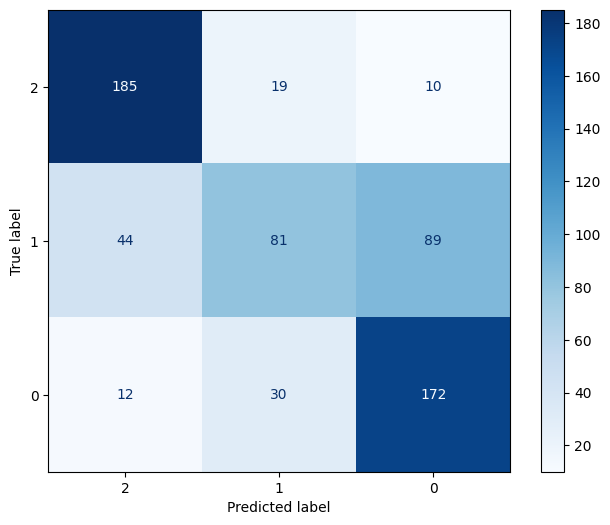

In [21]:
import matplotlib.pyplot as plt
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues)

# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_pT5.png')
plt.savefig('confusion_matrix_pT5.svg')

# Optionally, display the plot
plt.show()

In [22]:
# Prepare text input
text = "Real good Good deals Get there fast Real quick and good"
encoded_input = tokenizer(text, return_tensors="pt")
encoded_input = {k: v.to(device) for k, v in encoded_input.items()}

In [23]:
# Perform inference
output = model(**encoded_input)
pred = torch.argmax(output.logits, dim=-1)

In [24]:
# Decode sentiment
sent = "Negative" if pred.item() == 0 else "Neutral" if pred.item() == 1 else "Positive"

print(f"Text: {text}")
print(f"Sentiment: {sent}")

Text: Real good Good deals Get there fast Real quick and good
Sentiment: Positive
